# Evaluating Regression Models
Module 1 | Chapter 1 | Notebook 3

***
In this notebook we will evaluate the model quality of our first machine learning model using two widely used model quality metrics. These use the prediction errors, what we call residuals, i.e. the distance between predicted and real target values. By the end of this exercise you will be able to:
* Calculate and interpret the mean squared error
* Calculate and interpret the coefficient of determination
***


## Taiwanese house prices near to and far from the Metro


**Scenario:** A Taiwanese investor comes to you to find out how much his properties in Taiwan are actually worth. He might want to resell them. The data on the houses is located in *Taiwan_real_estate_prediction_data.xlsx*. How much are these houses worth?


In order to progress quickly, let's import the training data and process it like we did in the last lesson.


In [100]:
import pandas as pd
df = pd.read_excel('Taiwan_real_estate_training_data.xlsx', index_col='No')
col_names = ['house_age', 
              'metro_distance', 
              'number_convenience_stores', 
              'number_parking_spaces',
              'air_pollution',
              'light_pollution',
              'noise_pollution',
              'neighborhood_quality',
              'crime_score',
              'energy_consumption',
              'longitude', 
              'price_per_ping']
df.columns = col_names
df.loc[:, 'price_per_m2'] = df.loc[:, 'price_per_ping'] / 3.3
 

house_age                    float64
metro_distance               float64
number_convenience_stores      int64
number_parking_spaces          int64
air_pollution                float64
light_pollution              float64
noise_pollution              float64
neighborhood_quality         float64
crime_score                  float64
energy_consumption           float64
longitude                    float64
price_per_ping               float64
price_per_m2                 float64
dtype: object

The data dictionary for this data is as follows:

Column number | Column name       | Type      | Description
 ------------ | ---     | :---------:           | ------------:
0              | `'house_age'` | continuous (`float`) | age of the house in years
1              | `'metro_distance'` | continuous (`float`) | distance in meters to the next metro station
2              | `'number_convenience_stores'` | continuous (`int`) | Number of convenience stores nearby
3              | `'number_parking_spaces'` | continuous (`int`) | Number of parking spaces nearby
4              | `'air_pollution'` | continuous (`float`) | Air pollution value near the house
5              | `'light_pollution'` | continuous (`float`) | Light pollution value near the house
6              | `'light_pollution'` | continuous (`float`) | Light pollution value near the house
7              | `'neighborhood_quality'` | continuous (`float`) | average quality of life in the neighborhood
8              | `'crime_score'` | continuous (`float`) | crime score according to police
9              | `'energy_consumption'` | continuous (`float`) | The property's energy consumption
10              | `'longitude'` | continuous (`float`) | The property's longitude
11              | `'price_per_ping'` | continuous (`float`) | House price in Taiwan dollars per ping, one ping is 3.3 m²
12              | `'price_per_m2'` | continuous (`float`) | House price in Taiwan dollars per m²


We have already seen that the age of a house has a negative effect on the value of a property. What about the distance to the nearest metro station? Are properties more valuable if they are easily accessible by public transport?

We'll follow the five steps you learned in the last lesson to arrive at a prediction:

1. Choose model type
2. Instantiate the model with certain hyperparameters
3. Organize data into a feature matrix and target vector
4. Model fitting
5. Make predictions with the trained model


1) Import `LinearRegression` directly from the `sklearn.linear_model` module.


In [9]:
from sklearn.linear_model import LinearRegression

2) Instantiate a linear regression model with axis intercept and store it in the variable `model_metro`.


In [92]:
model_metro = LinearRegression(fit_intercept=True)

3) Store the data from the `'metro_distance'` column in a feature matrix called `features_metro` and the data from the `'price_per_m2'` column in a target vector called `target`.


**Important:** `features_metro` must be a `DataFrame`. Check that `features_metro` is not a `Series` by mistake.


In [93]:
features_metro = df.loc[:,['metro_distance']]
target = df.loc[:,'price_per_m2'] 

4) Now carry out the model fitting with `model_metro`, `features_metro` and `target`. Then print the parameters of the trained model: the intercept and the slope.


In [94]:
model_metro.fit(features_metro, target)
print(model_metro.coef_ *100)
print(round( model_metro.intercept_,2))

[-0.22128621]
13.94


If you've done everything right, a house with zero distance to a subway station should be worth $13.96 per square meter. With every meter of distance to the nearest metro station, the value of the property decreases by 0.2 cents.


5) Now we can use the trained model to make predictions. First import the data for the ten houses that the investor wants to make predictions for. They are located in the file *Taiwan_real_estate_prediction_data.xlsx*. Store them in the variable `df_aim`. Rename the column names using `col_names`.

Tip: Use the `'No'` column as the row name column again. Rename the columns just like you did with `df`.


In [29]:
df_aim = pd.read_excel( 'Taiwan_real_estate_prediction_data.xlsx', index_col=False)
df_aim

,No,X1 house age,X2 distance to the nearest MRT station,X3 number of convenience stores,X4 number of parking spaces,X5 air pollution,X6 light pollution,X7 noise pollution,X8 neighborhood quality,X9 crime score,X10 energy consumption,X11 longitude,Y house price of unit area
0,1,0.0,12.36000,7,72,1125.436807,243.043412,18.985221,0.481227,0.829688,59.592560,121.51486,NaN
1,2,0.0,44.52000,6,72,108.918247,232.545763,6.068610,0.530686,0.738343,89.217898,121.54024,NaN
2,3,12.0,84.87882,10,88,223.987861,402.289749,42.984450,0.645779,0.558472,95.941196,121.54228,NaN
3,4,13.3,22.45000,5,64,822.634911,340.743137,11.934130,0.247523,0.867096,90.597490,121.48458,NaN
4,5,34.0,10.48000,3,52,346.904902,227.855059,14.087371,0.463508,0.628561,60.069841,121.51254,NaN
5,6,3.0,12.38000,1,46,5.699197,200.837368,2.498199,0.547598,0.878642,92.919562,121.54391,NaN
6,7,15.0,56.12400,3,53,229.957124,380.822669,2.451917,0.378529,0.865401,97.744431,121.54391,NaN
7,8,27.5,1005.34000,9,74,218.621522,283.847670,4.793616,0.426784,0.771716,108.818687,121.53951,NaN
8,9,11.0,90.10000,5,66,822.634911,359.517345,11.971735,0.482081,0.960735,86.415252,121.54245,NaN
9,10,7.0,12.11000,5,63,236.626951,380.822669,24.526754,0.470417,0.705197,100.507061,121.53642,NaN


Save the distances to the nearest metro station for `df_aim` in the new variable `features_aim_metro`.


**Important:** `features_aim_metro` must be a `DataFrame`. Check that `features_aim_metro` is not a `Series` by mistake.


In [36]:
features_aim_metro = df_aim.loc[:,['X2 distance to the nearest MRT station']]
features_aim_metro

,X2 distance to the nearest MRT station
0,12.36000
1,44.52000
2,84.87882
3,22.45000
4,10.48000
5,12.38000
6,56.12400
7,1005.34000
8,90.10000
9,12.11000


Now use `model_metro` with its `my_model.predict()` method to determine the prices of the houses in the prediction data set. Store them in the variable `target_aim_pred_metro`.


In [38]:
target_aim_pred_metro = model_metro.predict(features_aim_metro)
print(target_aim_pred_metro)
print(type(target_aim_pred_metro))

[13.9086418  13.83747616 13.74816765 13.88631402 13.91280198 13.90859754
 13.8117981  11.71131394 13.7366139  13.90919502]
<class 'numpy.ndarray'>


**Important:** `target_aim_pred_metro` must be a `numpyArray`. Check that `target_aim_pred_metro` is not a `DataFrame` by mistake.


In [ ]:
print(type(target_aim_pred_metro))

Great! In the graphic below we have summarized this process visually. The training data is represented by dark blue dots in the scatter diagram. The regression line is light blue. You can see the predicted house prices in orange.


[(0.0, 6396.283)]

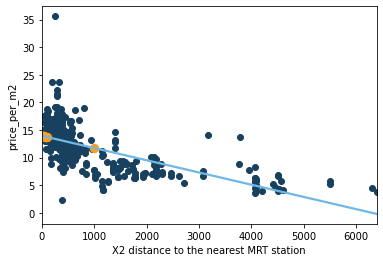

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.regplot(x=features_metro.iloc[:, 0],  # metro distances in training data set
            y=target,  # prices in training data set
            scatter_kws={'color':'#17415f',  # dark blue dots
                        'alpha':1},  # no transparency for dots
            line_kws={'color':'#70b8e5'},  # light blue regression line
            ci=None,  # no confidence intervals around line
           ax=ax)  # plot on current Axes

sns.regplot(x=features_aim_metro.iloc[:, 0],  # x-values of houses with estimated prices
            y=target_aim_pred_metro,  # estimated prices
            scatter_kws={'color':'#ff9e1c',  # orange dots
                        'alpha':1,  # no transparency for dots
                        's':70},  # dot size
            fit_reg=False,  # no additional regression line
            ci=None,  # no confidence intervals around line
           ax=ax)  # plot on current Axes

ax.set(xlim=[0, max(df.loc[:, 'metro_distance'])])

**Congratulations:** You have carried out your second linear regression. Now you have predicted the house prices for the real estate investor based on the house age and then based on the distance to the metro. Are these values correct? We'll look into this now.


## Comparing predictions


In the previous lesson, you predicted house prices based on their age. So that we can compare these with the house prices we just predicted, we'll calculate them again here. Store the regression model in of the variable `model_age`. The age values of the new houses, whose prices you should predict, can be found in `df_aim`. Store them in the feature matrix `features_aim_age`. You can store the predicted prices per square meter in the variable `target_aim_pred_age`. 

Tip: Follow the five steps again. You can skip the first step.


In [52]:
model_age = LinearRegression(fit_intercept=True)

features_age = df.loc[:, ['house_age']]
model_age.fit(features_age, target)

features_aim_age = df_aim.loc[:, ['X1 house age']]
target_aim_pred_age = model_age.predict(features_aim_age)

# features_aim_age  = df_aim.loc[:,['X1 house age']]
# model_age.fit(features_aim_age, target)
# target_aim_pred_age = model_age.predict(features_aim_age)

Print the prices in `target_aim_pred_age`. Do they match the values in `target_aim_pred_metro`? Print these now as well.


In [53]:
print(target_aim_pred_age)
print(target_aim_pred_metro)

[13.07287169 13.07287169 12.05222116 11.94165069 10.18102853 12.81770906
 11.79705853 10.7338809  12.13727538 12.47749222]
[13.9086418  13.83747616 13.74816765 13.88631402 13.91280198 13.90859754
 13.8117981  11.71131394 13.7366139  13.90919502]


You should have received the following values:
```python
Age: [13.07287169 13.07287169 12.05222116 11.94165069 10.18102853 12.81770906
 11.79705853 10.7338809  12.13727538 12.47749222] 

Metro: [13.9086418  13.83747616 13.74816765 13.88631402 13.91280198 13.90859754
 13.8117981  11.71131394 13.7366139  13.90919502]
```


These values differ from the values calculated previously. The following visualization shows how much the predictions differ from each other. The grey line represents the ideal case: the predicted values match perfectly. As you can see, none of the values are on the grey line. The predicted house prices therefore don't match up.


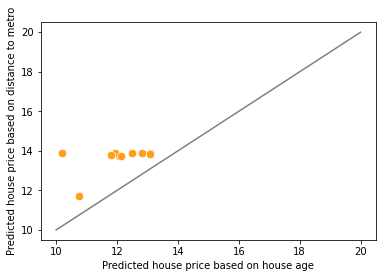

In [64]:
fig, ax = plt.subplots()

sns.scatterplot(x=target_aim_pred_age, 
                y=target_aim_pred_metro, 
                color='#ff9e1c',  # orange dots
                s=70,  # big dots
                ax=ax)  # draw on current Axes
ax.plot([10, 20], # x-values
       [10, 20],  # y-values
       'grey')
ax.set(xlabel='Predicted house price based on house age',
      ylabel='Predicted house price based on distance to metro');

**Congratulations:** You now have two different predicted price lists for ten of the real estate investor's houses. Which one can we trust more? To answer this, let's turn to the problem of determining the quality of regression models.


## Determining the quality of regression models with the *(rooted) mean squared error*


`sklearn` offers you six different options to determine the quality of regressions. You can find them all in the [official documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics). They are based on predicting data with the trained model and then comparing these predictions with the real values. The difference between a prediction and the real value is called a residual. It is the basis for evaluating the model. A good model predicts the values as they actually are. The residual should therefore be as small as possible.

In this lesson we will use the training data to determine the model quality.
To obtain the residuals, we treat the actual age values of the houses in the training dataset (`df`) as if we wanted a price prediction for them and store those in `target_pred_age`.

In [67]:
features_age = df.loc[:, ['house_age']]
target_pred_age = model_age.predict(features_age)

Now store the values that `model_metro` would predict for the houses from the training dataset, in `target_pred_metro`.


In [95]:
target_pred_metro = model_metro.predict(features_age)

Now we can visually compare whether the predicted property prices match the actual property prices for both models. The grey line in the graph represents the perfect prediction again. If a point lies on it, the predicted house price is the same as the actual house price.


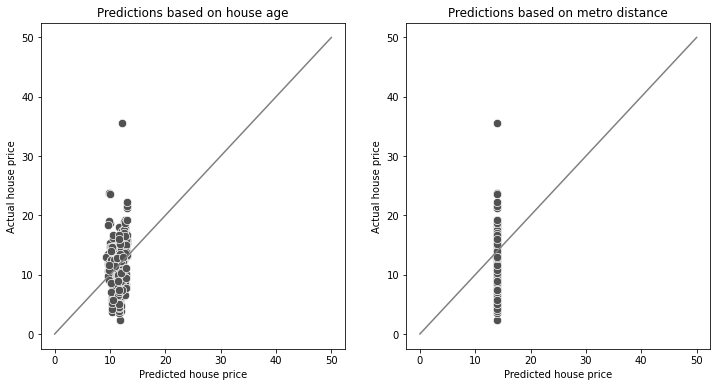

In [74]:
fig, ax = plt.subplots(1, 2, figsize=[12, 6])

# Predictions based on house age
sns.scatterplot(x=target_pred_age,
                y=target,
                color='#515151',  # grey dots
                s=70,  # big dots
                ax=ax[0]) # draw on current Axes
# diagonal
ax[0].plot([0, 50], # x-values
           [0, 50], # y-values
           'grey') # line colour

ax[0].set(xlabel='Predicted house price', 
          ylabel='Actual house price',
          title='Predictions based on house age');

# Predictions based on metro distance
sns.scatterplot(x=target_pred_metro, 
                y=target, 
                color='#515151',  # grey dots
                s=70,  # big dots
                ax=ax[1]) # draw on current Axes
# diagonal
ax[1].plot([0, 50], # x-values
           [0, 50], # y-values
           'grey') # line colour

ax[1].set(xlabel='Predicted house price',
          ylabel='Actual house price',
          title='Predictions based on metro distance');

The visual impression of the two scatter plots alone suggests worse predictions from `model_age` (left) than from `model_metro` (right). On the right, the points appear closer to the diagonal than on the left.

Metrics for the quality of regression models summarize this impression in a number. We'll concentrate here on two common values. Let's start with the mean squared error (*MSE*). To calculate this error, import the `mean_squared_error()` function directly from the `sklearn.metrics` module.


In [76]:
from sklearn.metrics import mean_squared_error 

`mean_squared_error()` proceeds as follows:
1. First it calculates the difference between predicted and actual values (the residual).
2. These differences are squared so that they are all positive and large differences are given extra weight.
3. The average of the squared differences is formed.

in short:

$MSE=\frac{1}{n}\sum_{i=1}^n(y_i-f(x_i))^2$

In Python code it would look like this:


In [77]:
import numpy as np
residuals = target - target_pred_age
residuals_squared = residuals**2
MSE = np.mean(residuals_squared)
MSE

16.968103205571758

The result of the `mean_squared_error()` function is exactly the same.


In [78]:
mean_squared_error(target, target_pred_age)

23.37086387856145

What does this value mean? The perfect regression model has a *mean squared error* of zero. In this case the value is higher. `model_age` misses the house prices in the data set by an average of $16.97\:\$^2$ per square meter. This information doesn't tell us that much at first, because nobody trades in square dollars. Usually we take the root from the MSE, arriving at the original unit of our *target*. The root of the MSE is known as the *rooted mean squared error* or **RMSE**

$RMSE = \sqrt{MSE}$

The RMSE of our house price prediction based on the age is therefore:
$RMSE = \sqrt{16,97\:\$^2}$ = 4.11 $

So how does it look for `model_metro`? Calculate the RMSE using `target` and `target_pred_metro`.
<br>Tip: To get the root of a value, use `np.sqrt()`


In [86]:
print(mean_squared_error(target, target_pred_age))
print(np.sqrt(mean_squared_error(target, target_pred_age)))

16.968103205571758
4.119235755036577


The house prices in the training dataset from `model_metro` fall short by an average of just $\sqrt{10,07}$, or 3.17 dollars per square meter. The visual impression from the graph above is therefore confirmed by the *rooted mean squared error*: `model_metro` produces better predictions than `model_age`.


**Congratulations:** You have determined the quality of a machine learning model for the first time. These kinds of model evaluations help data scientists to decide between models and which predictions can be trusted. However, the *rooted mean squared error* is not infallible. It's therefore worthwhile using several metrics to get an idea of the model quality. Now we'll get to know a second metric.


## Determining the quality of regression models with the coefficient of determination


In addition to the *rooted mean squared error*, [the coefficient of determination](https://de.wikipedia.org/wiki/Bestimmtheitsma%C3%9F), also called $R^{2}$, is often used to determine model quality. The coefficient of determination indicates how much dispersion in the data can be explained by the linear regression model. The perfect regression model has a coefficient of determination of one. The worst $R^{2}$ value a standard linear regression can create is zero. What is the value for `model_metro` and `model_age`?

Import the `r2_score()` function directly from the `sklearn.metrics` module.


In [89]:
from sklearn.metrics import r2_score

Now use the `r2_score()` functions with the inputs `target` and `target_pred_age` to calculate the coefficient of determination.


In [90]:
r2_score(target, target_pred_age)

0.05149232152450056

Only 5% of the dispersion in the data is explained by the model with age data. That is a further indication that the age data of the houses on its own is not really suitable for predicting the real estate price. Now calculate the coefficient of determination for `model_metro`.


In [96]:
r2_score(target, target_pred_metro)

-0.3064184943277679

44% of the dispersion in the data is explained by the model with metro distances. 

A look at the top graph and metric of model quality all suggest the same thing: The predictions from `model_metro` are more reliable than those from `model_age`.


**Congratulations:** You have learned how to differentiate between two regression models. In this case it was a decision between models with different features but otherwise the same model type with the same hyperparameter settings. Data scientists can use metrics for model quality to compare all kinds of regression models. Regression models can also differ in how many features they use. But before we turn to regression models with more than one feature, let's quickly look at the assumptions of the linear regression model in the next lesson.


**Remember:**
* The mean squared error expresses the mean squared distance between the prediction and measured value
* The RMSE is the root of the MSE. It can be directly interpreted, since it has the same dimension as the *target*.
* The coefficient of determination indicates how much dispersion in the data can be explained by the linear regression model.


***
Do you have any questions about this exercise? Look in the forum to see if they have already been discussed.
***
Found a mistake? Contact Support at support@stackfuel.com.
***
